In [1]:

import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('sst.csv')
#df.index.freq = 'D'

In [3]:
df

,time,latitude,longitude,SST
0,2013-01-02T00:00:00Z,12.75,74.00,28.80
1,2013-01-02T00:00:00Z,12.75,74.25,28.95
2,2013-01-02T00:00:00Z,13.00,74.00,28.80
3,2013-01-02T00:00:00Z,13.00,74.25,28.95
4,2013-01-03T00:00:00Z,12.75,74.00,29.10
...,...,...,...,...
12035,2021-04-01T00:00:00Z,13.00,74.25,NaN
12036,2021-04-02T00:00:00Z,12.75,74.00,31.05
12037,2021-04-02T00:00:00Z,12.75,74.25,NaN
12038,2021-04-02T00:00:00Z,13.00,74.00,30.90


In [4]:
df['time'] = pd.to_datetime(df['time']).dt.date

In [5]:
df.head()

,time,latitude,longitude,SST
0,2013-01-02,12.75,74.00,28.80
1,2013-01-02,12.75,74.25,28.95
2,2013-01-02,13.00,74.00,28.80
3,2013-01-02,13.00,74.25,28.95
4,2013-01-03,12.75,74.00,29.10


In [6]:
df['Date'] = pd.to_datetime(df['time'] )


In [7]:
df = df.set_index('Date')

In [8]:
df.index

DatetimeIndex(['2013-01-02', '2013-01-02', '2013-01-02', '2013-01-02',
               '2013-01-03', '2013-01-03', '2013-01-03', '2013-01-03',
               '2013-01-04', '2013-01-04',
               ...
               '2021-03-31', '2021-03-31', '2021-04-01', '2021-04-01',
               '2021-04-01', '2021-04-01', '2021-04-02', '2021-04-02',
               '2021-04-02', '2021-04-02'],
              dtype='datetime64[ns]', name='Date', length=12040, freq=None)

In [9]:
df=df.drop('time',axis=1)
df.head()

,latitude,longitude,SST
Date,,,
2013-01-02,12.75,74.00,28.80
2013-01-02,12.75,74.25,28.95
2013-01-02,13.00,74.00,28.80
2013-01-02,13.00,74.25,28.95
2013-01-03,12.75,74.00,29.10


In [10]:
df=df.dropna()

In [11]:
df.isnull().sum()

latitude     0
longitude    0
SST          0
dtype: int64

In [12]:
# daily Means
df=df.resample(rule='D').mean()
df.head()

,latitude,longitude,SST
Date,,,
2013-01-02,12.875,74.125,28.875
2013-01-03,12.875,74.125,29.025
2013-01-04,12.875,74.125,29.100
2013-01-05,12.875,74.000,29.325
2013-01-06,12.875,74.000,29.025


In [13]:
df= df.fillna(method='ffill')

In [14]:
df.isnull().sum()

latitude     0
longitude    0
SST          0
dtype: int64

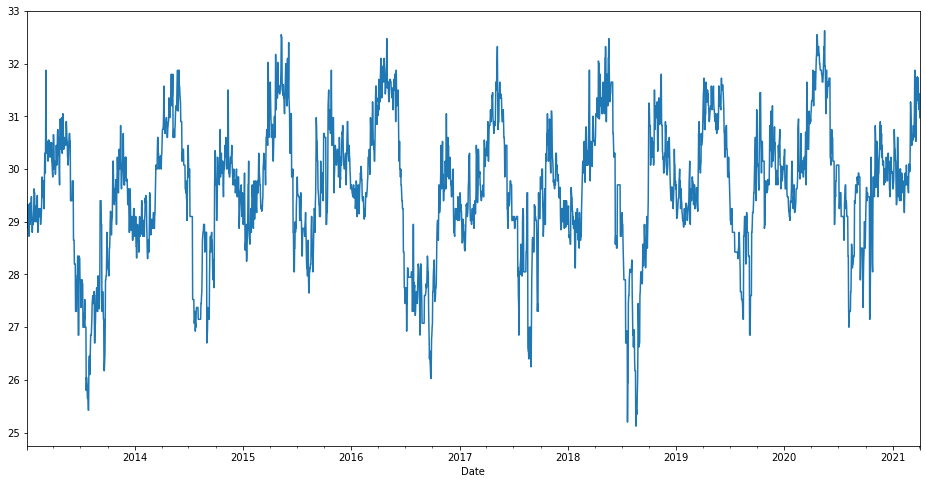

In [15]:
df['SST'].plot(figsize=(16,8));

In [16]:
df.columns

Index(['latitude', 'longitude', 'SST'], dtype='object')

In [17]:
df=df.drop(['latitude', 'longitude'],axis=1)


In [19]:
test_data=df.tail(12)
test_data

,SST
Date,
2021-03-22,31.2750
2021-03-23,31.7250
2021-03-24,31.3500
2021-03-25,31.7500
2021-03-26,31.3000
2021-03-27,31.7250
2021-03-28,31.7250
2021-03-29,31.2375
2021-03-30,31.2750


In [20]:
len(df)

3013

In [ ]:
train = df.iloc[:3010]
test = df.iloc[3010:]
print(type(train['SST']))
print(train['SST'])


<class 'pandas.core.series.Series'>
Date
2013-01-02    28.8750
2013-01-03    29.0250
2013-01-04    29.1000
2013-01-05    29.3250
2013-01-06    29.0250
               ...   
2021-03-26    31.3000
2021-03-27    31.7250
2021-03-28    31.7250
2021-03-29    31.2375
2021-03-30    31.2750
Freq: D, Name: SST, Length: 3010, dtype: float64


In [ ]:
len(test)

3

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
# IGNORE WARNING ITS JUST CONVERTING TO FLOATS
# WE ONLY FIT TO TRAININ DATA, OTHERWISE WE ARE CHEATING ASSUMING INFO ABOUT TEST SET
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
scaled_train

array([[0.5  ],
       [0.52 ],
       [0.53 ],
       ...,
       [0.88 ],
       [0.815],
       [0.82 ]])

In [ ]:
# define generator
n_input = 10
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
len(scaled_train)

3010

In [ ]:
len(generator) 

3000

In [ ]:
# What does the first batch look like?
X,y = generator[0]
print(X,y)
print(generator)

[[[0.5       ]
  [0.52      ]
  [0.53      ]
  [0.56      ]
  [0.52      ]
  [0.5       ]
  [0.49      ]
  [0.48      ]
  [0.55      ]
  [0.56333333]]] [[0.56333333]]


In [ ]:
print(X.ndim)
print(X.shape)
print(y.ndim)
print(y.shape)
print(len(X))
print(len(y))

3
(1, 10, 1)
2
(1, 1)
1
1


In [ ]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.5        0.52       0.53       0.56       0.52       0.5
 0.49       0.48       0.55       0.56333333]
Predict this y: 
 [[0.56333333]]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Bidirectional
#from numpy import array
#from keras.models import Sequential
#from keras.layers import LSTM
#from keras.layers import Dense
#from keras.layers import Flatten
#from keras.layers import TimeDistributed
#from keras.layers.convolutional import Conv1D
#from keras.layers.convolutional import MaxPooling1D
 


In [ ]:
# define model
model = Sequential()
model.add(Bidirectional(LSTM(100, activation='relu'), input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
#model = Sequential()
#model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_input, n_features)))
#model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
#model.add(TimeDistributed(Flatten()))
#model.add(LSTM(100, activation='relu'))
#model.add(Dense(1))
#model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 200)               81600     
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 81,801
Trainable params: 81,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit model
model.fit_generator(generator,epochs=20)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


3000/3000 [==============================] - 38s 5ms/step - loss: 0.0144
Epoch 2/20
3000/3000 [==============================] - 16s 5ms/step - loss: 0.0028
Epoch 3/20
3000/3000 [==============================] - 16s 5ms/step - loss: 0.0021
Epoch 4/20
3000/3000 [==============================] - 16s 5ms/step - loss: 0.0023
Epoch 5/20
3000/3000 [==============================] - 16s 5ms/step - loss: 0.0023
Epoch 6/20
3000/3000 [==============================] - 16s 5ms/step - loss: 0.0022
Epoch 7/20
3000/3000 [==============================] - 16s 5ms/step - loss: 0.0021
Epoch 8/20
3000/3000 [==============================] - 16s 5ms/step - loss: 0.0022
Epoch 9/20
3000/3000 [==============================] - 16s 5ms/step - loss: 0.0021
Epoch 10/20
3000/3000 [==============================] - 16s 5ms/step - loss: 0.0018
Epoch 11/20
3000/3000 [==============================] - 16s 5ms/step - loss: 0.0020
Epoch 12/20
3000/3000 [==============================] - 16s 5ms/step - loss: 0.0021


In [ ]:
model.history.history.keys()

dict_keys(['loss'])

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

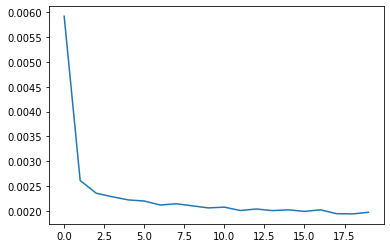

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

In [ ]:
current_batch.shape

(1, 10, 1)

In [ ]:
current_batch

array([[[0.78      ],
        [0.82      ],
        [0.88      ],
        [0.83      ],
        [0.88333333],
        [0.82333333],
        [0.88      ],
        [0.88      ],
        [0.815     ],
        [0.82      ]]])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
test_predictions

[array([0.8219727], dtype=float32),
 array([0.82680964], dtype=float32),
 array([0.79103017], dtype=float32)]

In [ ]:
scaled_test

array([[0.8 ],
       [0.84],
       [0.78]])

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
true_predictions

array([[31.28979546],
       [31.32607234],
       [31.05772626]])

In [ ]:
test

,SST
Date,
2021-03-31,31.125
2021-04-01,31.425
2021-04-02,30.975


In [ ]:
# IGNORE WARNINGS
test['Predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
test

,SST,Predictions
Date,,
2021-03-31,31.125,31.289795
2021-04-01,31.425,31.326072
2021-04-02,30.975,31.057726


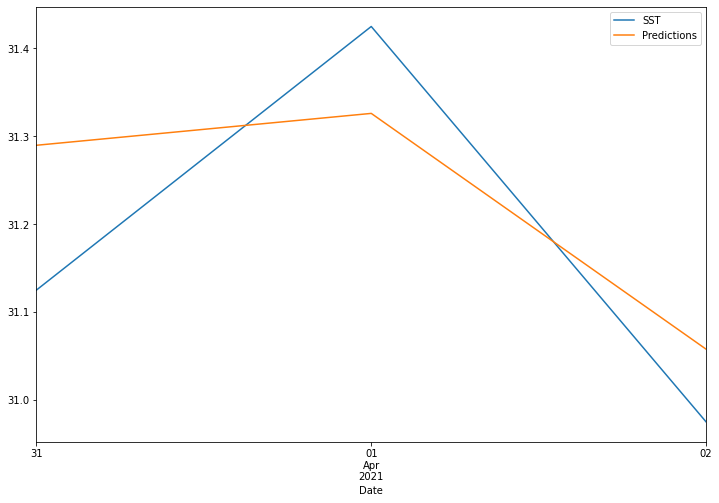

In [ ]:
test.plot(figsize=(12,8))

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
rmse=mean_squared_error(test['SST'],test['Predictions'],squared=False)
rmse

0.12081371430355142

In [ ]:
mae= mean_squared_error(test['SST'],test['Predictions'])
mae

0.014595953563820145

In [ ]:
a=[31.01682029, 30.57864355,
 30.12687876]